# Click Through Rate (CTR) Model Building Project

#### In this Term Project, the CTR dataset will be analyzed to find out which features are most important or most predictive of  click through rate (CTR) of email campaigns. The dataset can be downloaded from here: (https://www.kaggle.com/datasets/gauravduttakiit/jobathon-august-2022). "CTR is calculated by dividing the number of clicks by the number of impressions and expressing the result as a percentage. According to recent benchmarks, the average CTR in Google AdWords across all industries is 3.17% on the search network and 0.45% on the display network." (Dhunakaran, 2022).

### Table of Contents
$\bullet$ Exploratory Data Analysis\
$\bullet$ Prepare the Data for Modeling\
$\bullet$ Train and Evaluate the Model

## Libraries and Data Loading

In [792]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import linear_model,metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder

In [793]:
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [794]:
# loading train and test datasets
#train=pd.read_csv('train_CTR.csv',index_col='campaign_id')
#test=pd.read_csv('test_CTR.csv',index_col='campaign_id')
train=pd.read_csv('train_CTR.csv')
test=pd.read_csv('test_CTR.csv')

In [795]:
# check the shapes of the datasets
print('Number of rows and columns in train dataset',train.shape, '\n')
print('Number of rows and columns in test dataset',test.shape)

Number of rows and columns in train dataset (1888, 22) 

Number of rows and columns in test dataset (762, 21)


In [796]:
# Look at first 5 samples in train dataset
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [797]:
# Look at first 5 samples in train dataset
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [798]:
# Info of the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [799]:
# Info of the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_timer            762 non-null    int64 
 16  is_emoticons        762 no

### Observations
$\bullet$ The train dataset has $1888$ rows and $21$ columns \
$\bullet$ The test dataset has $762$ rows and $20$ columns \
$\bullet$ All the features will be useful in this analysis. Any categorical features will have dummy variables assigned to them for modeling \
$\bullet$ There is a mix of numerical and categorical data, where the majority are integers \
$\bullet$ The target of the model will be 'click_rate'

### Data Cleaning and Preparation for Visualization and Model

In [800]:
# check for null values
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [801]:
# check for null values
test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [802]:
train.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [803]:
test.nunique()

campaign_id           762
sender                 12
subject_len           129
body_len              697
mean_paragraph_len     83
day_of_week             7
is_weekend              2
times_of_day            3
category               16
product                39
no_of_CTA              25
mean_CTA_len           59
is_image                5
is_personalised         2
is_quote                6
is_timer                1
is_emoticons            7
is_discount             2
is_price                4
is_urgency              2
target_audience        16
dtype: int64

In [805]:
# encode the categorical times_of_day feature into corresponding numerical values for the model
label_encoder = LabelEncoder()
train['times_of_day'] = label_encoder.fit_transform(train['times_of_day'])
test['times_of_day'] = label_encoder.fit_transform(test['times_of_day'])

In [806]:
train.head(6)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
5,6,3,54,2569,256,4,0,0,2,11,...,0,0,0,0,0,0,0,0,10,0.500000


In [808]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,2,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,0,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,0,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,2,6,26,...,40,0,0,0,0,0,0,0,0,14


### Observations
$\bullet$ There are no missing data to deal with as there are no null values\
$\bullet$ The number of unique values in the datasets are found in the features body_len and click_rate
$\bullet$ times_of_day converted into numerical values from categorical (0 = Evening, 1 = Morning, 2 = Noon)

### Target Variable Investigation

In [809]:
train['click_rate'].describe()

count    1888.000000
mean        0.041888
std         0.084223
min         0.000000
25%         0.005413
50%         0.010686
75%         0.035589
max         0.897959
Name: click_rate, dtype: float64

<AxesSubplot:ylabel='Density'>

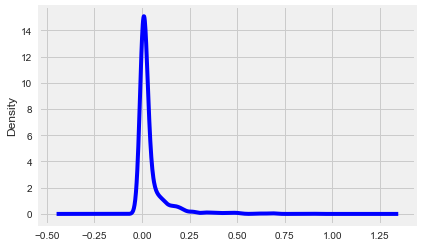

In [810]:
# View a visualization of the target variable
train.click_rate.plot.density(color='blue')

### Observations
$\bullet$ The max click-through rate in the train dataset is 89%\
$\bullet$ The train dataset click-through rate is slightly skewed to the right (positive skew)

## Single Feature Exploration

<AxesSubplot:xlabel='mean_paragraph_len', ylabel='count'>

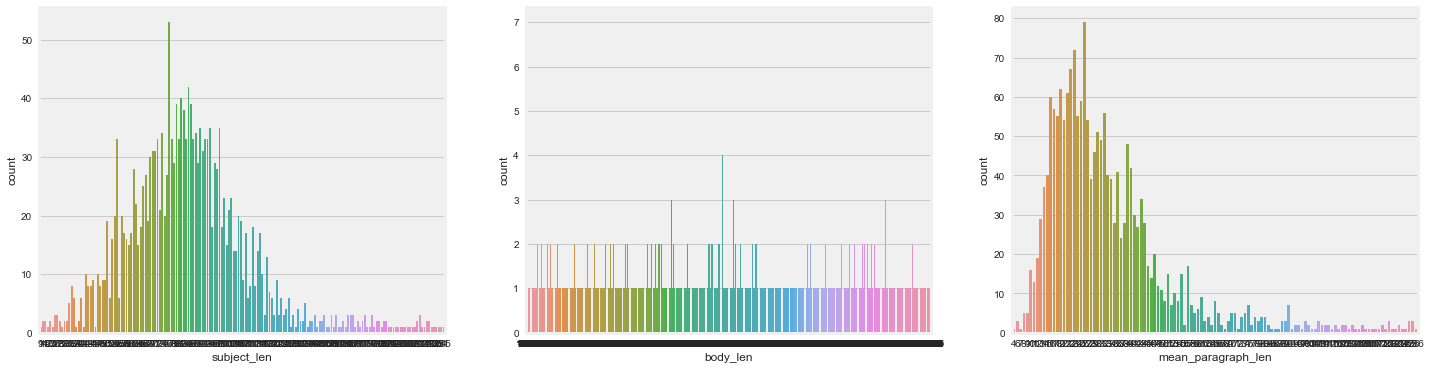

In [636]:
## Features related to number of characters: subject_len, body_len, mean_paragraph_len

plt.figure(figsize=(22,6))

# No. of Call To Actions in an email
plt.subplot(1,3,1)
sns.countplot('subject_len',data=train)

# Average no. of characters in a CTA
plt.subplot(1,3,2)
sns.countplot('body_len',data=train)

# Cluster label of the target audience
plt.subplot(1,3,3)
sns.countplot('mean_paragraph_len',data=train)

### Observations
$\bullet$ The majority of emails have 50-100 characters in a subject \
$\bullet$ The number of characters in the email body were equally distributed from 400-40,000\
$\bullet$ The majority of emails have a mean character count of 10-50

<AxesSubplot:xlabel='product', ylabel='count'>

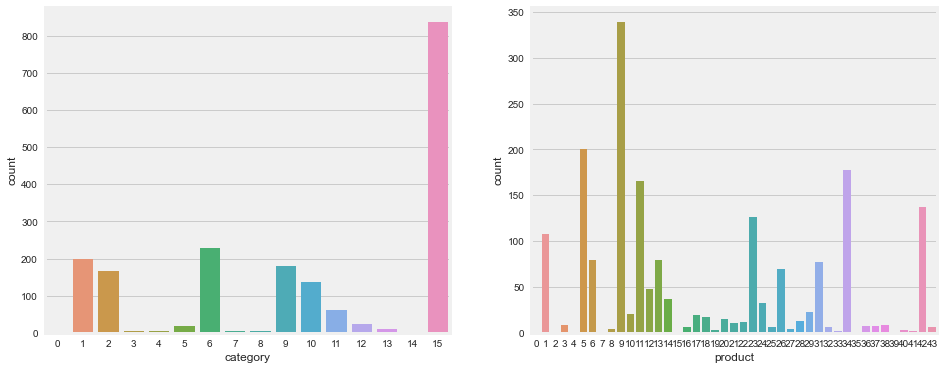

In [637]:
## Features related to product: product category and product type

plt.figure(figsize=(22,6))

# No. of Call To Actions in an email
plt.subplot(1,3,1)
sns.countplot('category',data=train)

# Average no. of characters in a CTA
plt.subplot(1,3,2)
sns.countplot('product',data=train)

### Observations
$\bullet$ The majority of email campaigns were related to product category 15 \
$\bullet$ The majority of email campaigns are related to product type 9, 5, and 34

<AxesSubplot:xlabel='target_audience', ylabel='count'>

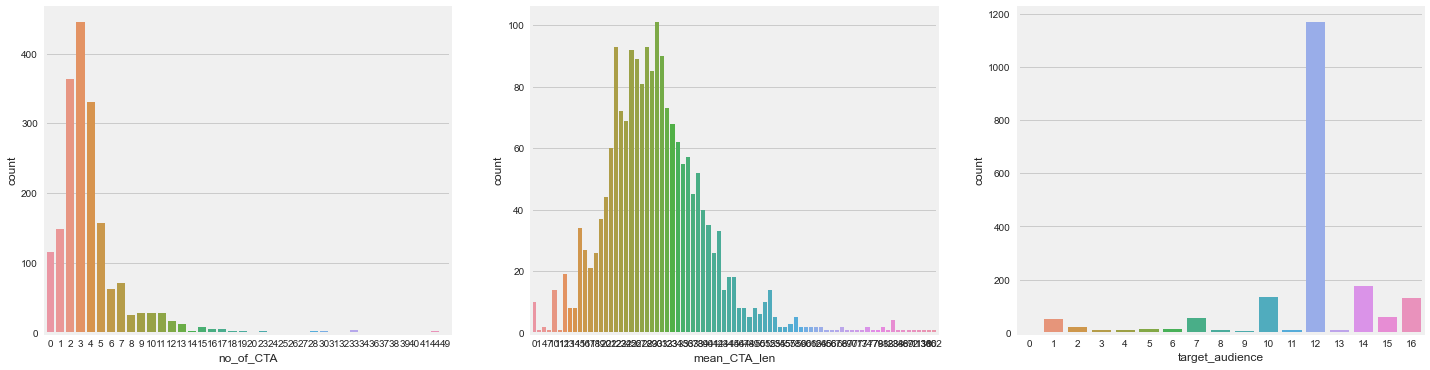

In [638]:
## Features related to Call to Action (CTA) and Audience

plt.figure(figsize=(22,6))

# No. of Call To Actions in an email
plt.subplot(1,3,1)
sns.countplot('no_of_CTA',data=train)

# Average no. of characters in a CTA
plt.subplot(1,3,2)
sns.countplot('mean_CTA_len',data=train)

# Cluster label of the target audience
plt.subplot(1,3,3)
sns.countplot('target_audience',data=train)

### Observations
$\bullet$ The majority of email campaigns had between 0 and 5 Call to Actions (asked the end user to do something) \
$\bullet$ The majority of email campaigns had an average mean character length between 40-50 \
$\bullet$ The majority of email campaigns had a target audience of cluster number 12

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

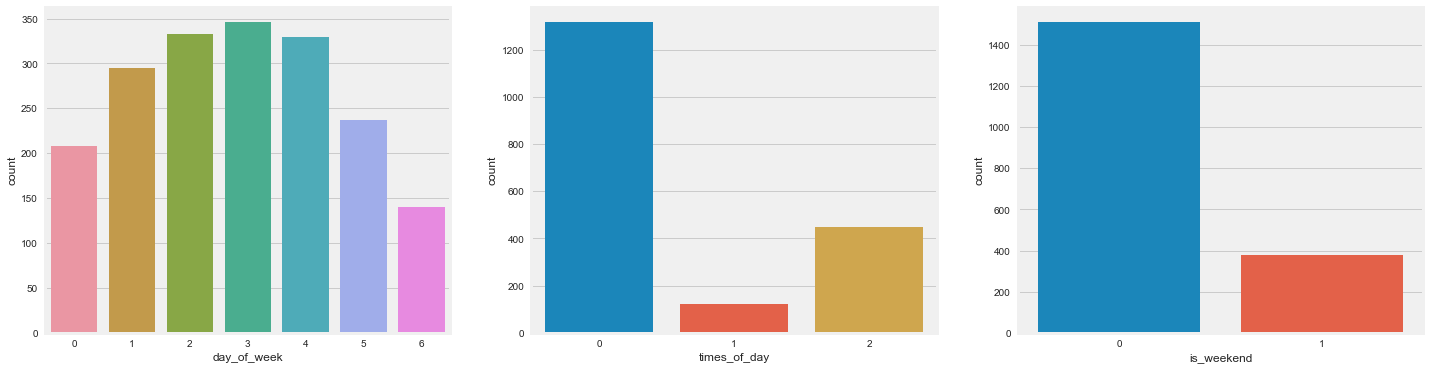

In [639]:
## Features related to time: campaigns related to day of week, time of day, and weekend/weekdays

# Binary Features
plt.figure(figsize=(22,6))

# Day of week
plt.subplot(1,3,1)
sns.countplot('day_of_week',data=train)

# Times of day
plt.subplot(1,3,2)
sns.countplot('times_of_day',data=train)

# Weekend or not
plt.subplot(1,3,3)
sns.countplot('is_weekend',data=train)

### Observations
$\bullet$ Assuming that 0-6 equals Sunday-Saturday, most of the email campaigns were set on Tuesday-Thursday\
$\bullet$ Most of the email campaigns where sent in the evening when people were off work\
$\bullet$ Assuming 0 is not a weekend day and 1 is a weekend day, most of the email campaigns were sent during weekdays

<AxesSubplot:xlabel='is_emoticons', ylabel='count'>

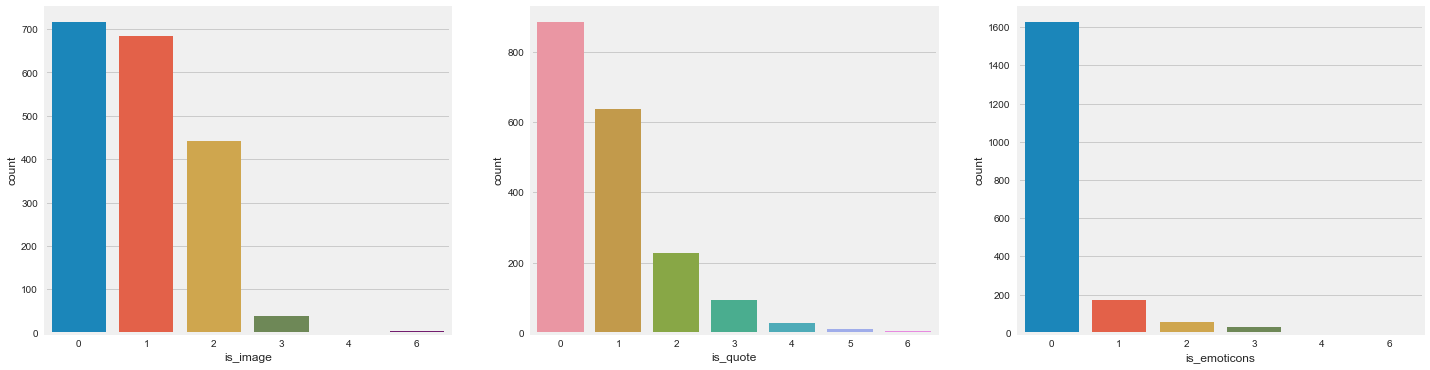

In [640]:
## Features related to the contents of the email: number of images, number of quotes and number of emoticons

plt.figure(figsize=(22,6))

# No.of Images in an email
plt.subplot(1,3,1)
sns.countplot('is_image',data=train)

# No.of quotes in an email
plt.subplot(1,3,2)
sns.countplot('is_quote',data=train)

# No. of emoticons in an email
plt.subplot(1,3,3)
sns.countplot('is_emoticons',data=train)

### Observations
$\bullet$ Most of the email campaigns contained no images, or 1-2 images\
$\bullet$ Most of the email campaigns had no quotes, or between 1-3\
$\bullet$ The majority of the email campaigns contained no emoticons

<AxesSubplot:xlabel='is_urgency', ylabel='count'>

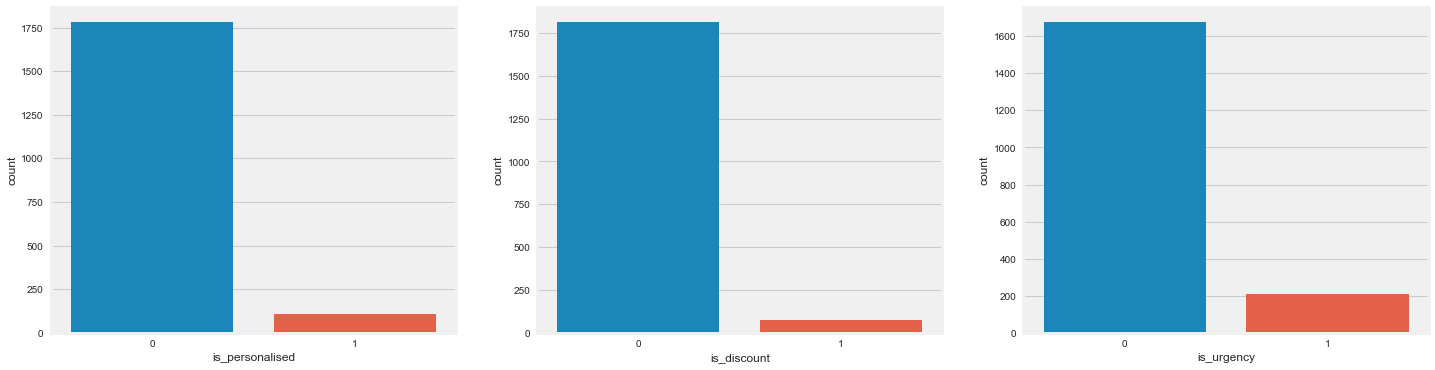

In [641]:
## Features with boolean (0 or 1) values

plt.figure(figsize=(22,6))

# Personalized emails or not
plt.subplot(1,3,1)
sns.countplot('is_personalised',data=train)

# Discount email or not
plt.subplot(1,3,2)
sns.countplot('is_discount',data=train)

# Urgent email or not
plt.subplot(1,3,3)
sns.countplot('is_urgency',data=train)

### Observations
$\bullet$ The majority of email campaigns were personalized to the user \
$\bullet$ The majority of email campaigns did not contain a discount \
$\bullet$ The majority of email campaigns were not urgent

<AxesSubplot:xlabel='is_timer', ylabel='count'>

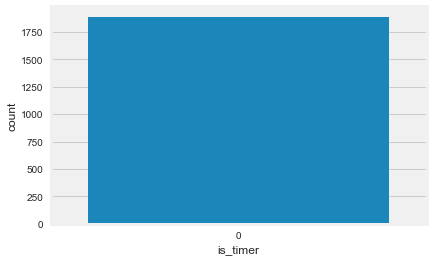

In [642]:
# Email timer or not
plt.subplot(1,1,1)
sns.countplot('is_timer',data=train)

### Observations
$\bullet$ Assuming 0 means that the email contains a timer, then all of the campaigns contained this

## Multiple Feature Exploration

<AxesSubplot:xlabel='product', ylabel='click_rate'>

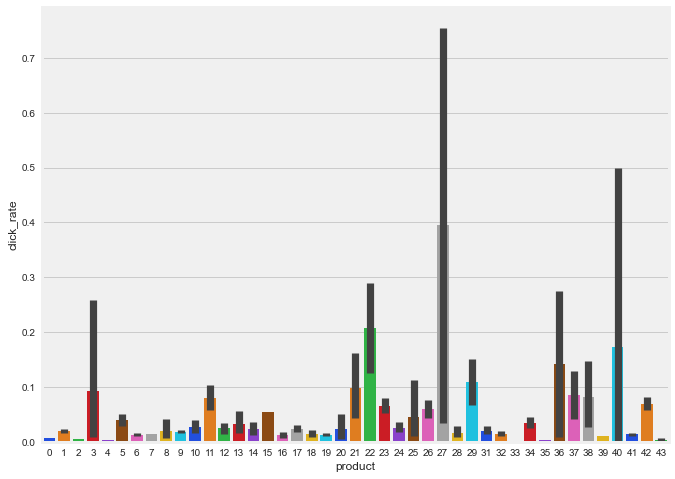

In [643]:
# Click rate vs Product Type the email is related to

plt.figure(figsize=(10,8))
sns.barplot(x='product',y='click_rate',data=train,palette='bright')

### Observations
$\bullet$ Email campaigns related to products 3, 22, 27, 36 and 40 have the highest click-through rate (27 has the highest)

<Figure size 1440x576 with 0 Axes>

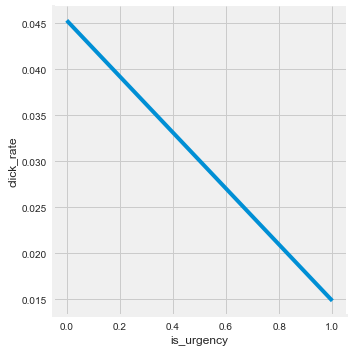

In [644]:
# click rate vs email urgency
plt.figure(figsize=(20,8))
sns.relplot(x="is_urgency", y="click_rate",ci=None,kind="line", data=train)

### Observations
$\bullet$ Assuming 0 means urgent and 1 means not urgent, then if the email campaign is marked as Urgent then the click-through rate is higher

<Figure size 1440x576 with 0 Axes>

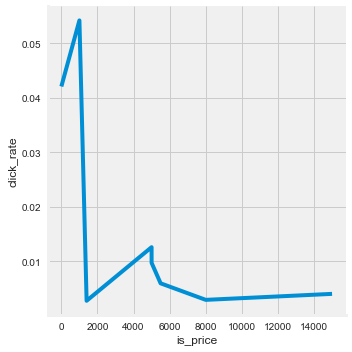

In [645]:
# click rate vs nominal price listed in email
plt.figure(figsize=(20,8))
sns.relplot(x="is_price", y="click_rate",ci=None,kind="line", data=train)

### Observations
$\bullet$ If price is between 0 and 1500, then the click-through rate is higher

<Figure size 1440x576 with 0 Axes>

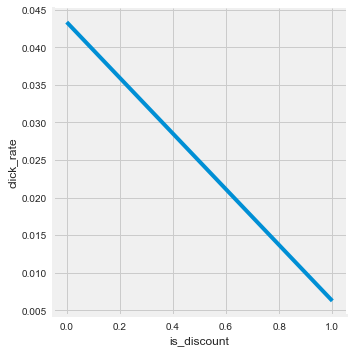

In [646]:
# click rate vs emails containing discounts
plt.figure(figsize=(20,8))
sns.relplot(x="is_discount", y="click_rate",ci=None,kind="line", data=train)

### Observations
$\bullet$ Assuming 0 means email includes discount and 1 means does not include discount, then if the email campaigns with a discount included have a higher click-through rate

<Figure size 1440x576 with 0 Axes>

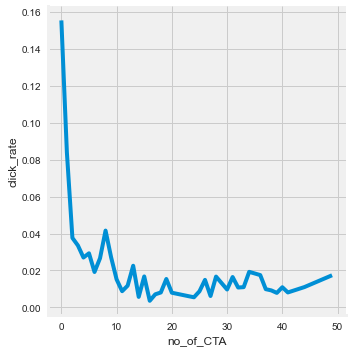

In [647]:
# click rate vs number of Call to Actions in the email
plt.figure(figsize=(20,8))
sns.relplot(x="no_of_CTA", y="click_rate",ci=None,kind="line", data=train)

### Observations
$\bullet$ The click-through rate is much higher for those email campaigns between 0-5 Call to Actions (CTA). We can assume the higher the CTA the better the email campaign.

<Figure size 1440x576 with 0 Axes>

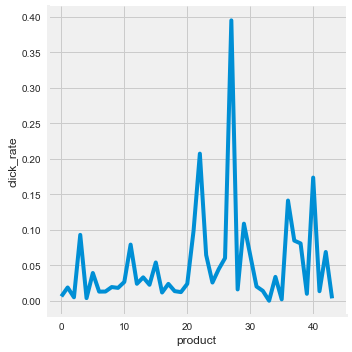

In [648]:
# click rate vs product type
plt.figure(figsize=(20,8))
sns.relplot(x="product", y="click_rate",ci=None,kind="line", data=train)

### Observations
$\bullet$ Product 27 has the highest click-through rate

### Spearman Correlation Matrix of Categorical and Numerical Variables

<AxesSubplot:>

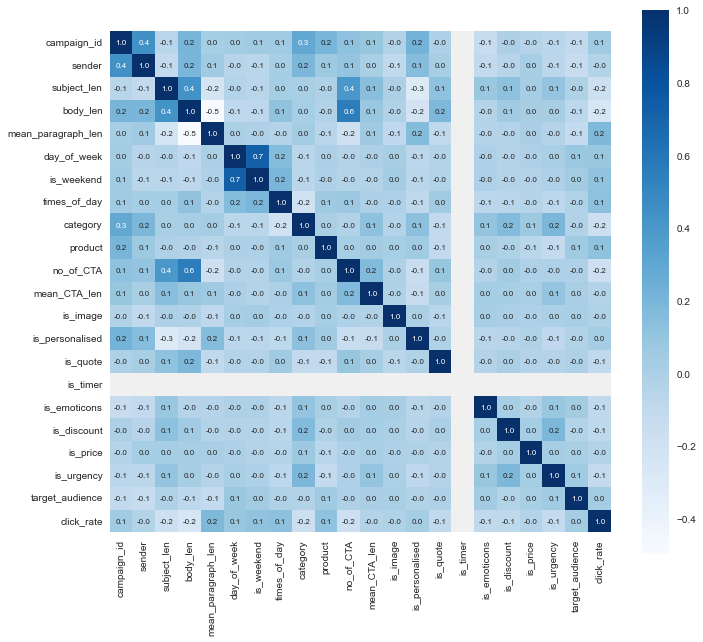

In [811]:
# constructing a heatmap to understand the correlation
correlation = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### Observations
$\bullet$ The features most positively correlated to the target variable 'click_rate' are: mean_paragraph_length, day_of_week, is_weekend, and product \
$\bullet$ The features most negatively correlated to  the target variable 'click_rate' are: subject_len, body_len, category, and no_of_CTA

### Chi-Squared (X2) Features

$\bullet$ "Let’s consider a scenario where we need to determine the relationship between the independent category feature (predictor) and dependent category feature(response). In feature selection, we aim to select the features which are highly dependent on the response.\
$\bullet$ When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. \
$\bullet$ In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training." (Gajawada, 2022)

In [812]:
#split the data into a training and test set
#we do this before making any modifications to the data to prevent data snooping
X_chi = train.drop(['click_rate'], axis = 1)
#get the target
y_chi = train['click_rate']
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y_chi, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_chi = X_train_chi.reset_index(drop = True) #drop + True drops the previous index
X_test_chi = X_test_chi.reset_index(drop = True)
y_train_chi = y_train_chi.reset_index(drop = True)
y_test_chi = y_test_chi.reset_index(drop = True)

In [813]:
# Create target and feature_names list
features_chi = X_train_chi
target_chi = y_train_chi

In [814]:
# change y from object to intto support chi2
target_chi=target_chi.astype('int')

In [815]:
# Select 5 features with highest chi-squared statistics
chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features_chi, target_chi)

In [816]:
# Show results
print ("Original number of features:", features_chi.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 21
Reduced number of features: 5


In [817]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features_chi.iloc[:,cols]
features_df_new

,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,0,0,0,0,12
1,0,0,0,0,12
2,0,0,0,0,12
3,0,0,0,0,12
4,0,0,0,0,12
...,...,...,...,...,...
1505,0,0,0,0,16
1506,0,0,0,0,12
1507,0,0,0,0,16
1508,0,0,0,0,12


### Observations
$\bullet$ The Chi-Squared (most dependent) features on the target (click_rate) are: is_emoticons, is_discount, is_price, is_urgent, and target_audience

## Split Data into Features and Target

In [683]:
# https://www.geeksforgeeks.org/linear-regression-python-implementation/
# Splitting the data into Features and Target
X = train.drop(['click_rate'],axis=1)
y = train['click_rate']

In [684]:
# Splitting the data into Training data and Test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [685]:
#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [686]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#see how many have heart disease (1) and don't have heart disease (0) in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(1510, 21)
(378, 21)
(1510,)
(378,)
0.000000    35
0.083333     4
0.076923     3
0.166667     3
0.008403     3
            ..
0.011674     1
0.007388     1
0.006959     1
0.016350     1
0.020116     1
Name: click_rate, Length: 1445, dtype: int64
0.000000    4
0.500000    2
0.010000    2
0.005001    1
0.002979    1
           ..
0.004480    1
0.006661    1
0.023228    1
0.049625    1
0.012979    1
Name: click_rate, Length: 373, dtype: int64


## Model Selection

In [687]:
# fit the model to the training set
model = reg.fit(X_train,y_train)
# Predicting on the test data
pred_test_weight = model.predict(X_test)

In [688]:
algos = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), XGBRegressor()]

names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'K Neighbors Regressor', 'Decision Tree Regressor', 'XGBoost Regressor']

r2_score_list = []

In [689]:
for name in algos:
    model = name                           # Load the model
    model.fit(X_train, y_train)            # Fit the model with training data
    test_data_pred = model.predict(X_test)        # prediction on test data(i.e Y_pred)
    r2 = metrics.r2_score(Y_test, test_data_pred)   # R2 error
    r2_score_list.append(r2)

In [690]:
evaluation = pd.DataFrame({'Model': names, 'r2': r2_score_list})

In [691]:
evaluation

,Model,r2
0,Linear Regression,0.116435
1,Lasso Regression,0.066211
2,Ridge Regression,0.116605
3,K Neighbors Regressor,0.255813
4,Decision Tree Regressor,-0.299221
5,XGBoost Regressor,0.505293


### Observations
$\bullet$ The model with the best R2 value (the performance metric for linear regression models) is XGBoost Regressor. This model will be used as the model of choice for this dataset.

## Train and Evaluate the XGBoost Regressor Model

In [692]:
# https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html
# instantiate the xgbr model
xgbr = xgb.XGBRegressor(verbosity=0)

In [693]:
# fit the model with the trained data
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [694]:
# check the training score
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9954809000505309


In [695]:
# check the cross validation score
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.33


In [696]:
# check KFold method in cross-validation
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.43


In [ ]:
## Findings: The model is around 34-43% accurate on average

In [697]:
# predict test data
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
MSE: 3.35
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.00
RMSE: 0.06


In [698]:
# The coefficient of determination (R2 value): 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, ypred)) 

Coefficient of determination (R2): 0.56


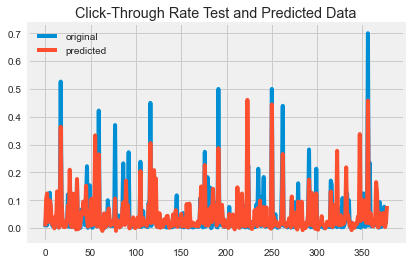

In [699]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Click-Through Rate Test and Predicted Data")
plt.legend()
plt.show()

### Observations
$\bullet$ "R-squared is a measure of how well a linear regression model “fits” a dataset. Also commonly called the coefficient of determination, R-squared is the proportion of the variance in the response variable that can be explained by the predictor variable.\
$\bullet$ In general, the larger the R-squared value, the more precisely the predictor variables are able to predict the value of the response variable.\
$\bullet$ How high an R-squared value needs to be depends on how precise you need to be. For example, in scientific studies, the R-squared may need to be above 0.95 for a regression model to be considered reliable. In finance, an R-Squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation.." (Zach, 2020) \
$\bullet$ The XGBoost Regressor model performed as expected with an R2 value of 0.56. This is a medium low correlation, which is acceptable for a real-life scenario.\
$\bullet$ The next step is to see if the R2 value can be improved using the log of click_rate since the target is right skewed

## Train and Evaluate the XGBoost Regressor Model with Log of Target Variable

In [703]:
# Create new dataframes for this new model to start fresh
train_log=pd.read_csv('train_CTR.csv')
test_log=pd.read_csv('test_CTR.csv')

In [704]:
# encode the categorical labels
label_encoder = LabelEncoder()
train_log['times_of_day'] = label_encoder.fit_transform(train_log['times_of_day'])

<AxesSubplot:ylabel='Density'>

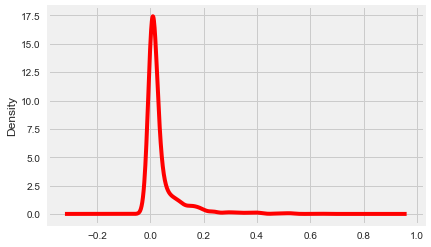

In [705]:
# Reduce the skewness of the target variable with log
train_log['click_rate_log']  = np.log(train_log['click_rate']+1)
train_log.click_rate_log.plot.density(color='red')

In [706]:
# Look at the skew in both click_rate and click_rate_log
print(train_log['click_rate'].skew())
print(train_log['click_rate_log'].skew())

4.317743085163305
3.6811416192586184


In [707]:
train_log.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,click_rate_log
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,14,0.103079,0.098105
1,2,3,54,2570,256,5,1,1,2,11,...,0,0,0,0,0,0,0,10,0.700000,0.530628
2,3,3,59,12801,16,5,1,2,2,11,...,0,1,0,0,0,0,0,16,0.002769,0.002765
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,10,0.010868,0.010809
4,5,3,80,10011,27,5,1,2,6,26,...,0,1,0,0,0,0,0,14,0.142826,0.133504


In [708]:
# https://www.geeksforgeeks.org/linear-regression-python-implementation/
# Splitting the data into Features and Target
X_log = train_log.drop(['click_rate_log'],axis=1)
y_log = train_log['click_rate_log']

In [709]:
# Splitting the data into Training data and Test data(20%)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size = 0.2, random_state = 22)

In [710]:
#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_log = X_train_log.reset_index(drop = True) #drop + True drops the previous index
X_test_log = X_test_log.reset_index(drop = True)
y_train_log = y_train_log.reset_index(drop = True)
y_test_log = y_test_log.reset_index(drop = True)

In [711]:
#show the sizes of the training and test sets
print(X_train_log.shape)
print(X_test_log.shape)
print(y_train_log.shape)
print(y_test_log.shape)
#see how many have heart disease (1) and don't have heart disease (0) in training and test sets
print(y_train_log.value_counts())
print(y_test_log.value_counts())

(1510, 22)
(378, 22)
(1510,)
(378,)
0.000000    35
0.080043     4
0.074108     3
0.154151     3
0.008368     3
            ..
0.011607     1
0.007361     1
0.006935     1
0.016218     1
0.019916     1
Name: click_rate_log, Length: 1445, dtype: int64
0.000000    4
0.405465    2
0.009950    2
0.004989    1
0.002974    1
           ..
0.004470    1
0.006639    1
0.022962    1
0.048433    1
0.012895    1
Name: click_rate_log, Length: 373, dtype: int64


In [712]:
# instantiate the xgbr model
xgbr_log = xgb.XGBRegressor(verbosity=0)

In [713]:
# fit the model with the trained data
xgbr_log.fit(X_train_log, y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [714]:
# check the training score
score_log = xgbr_log.score(X_train_log, y_train_log)  
print("Training score: ", score_log)

Training score:  0.9999344088695763


In [715]:
# check the cross validation score
scores_log = cross_val_score(xgbr_log, X_train_log, y_train_log,cv=10)
print("Mean cross-validation score: %.2f" % scores_log.mean())

Mean cross-validation score: 1.00


In [716]:
# check KFlold method in cross-validation
kfold_log = KFold(n_splits=10, shuffle=True)
kf_cv_scores_log = cross_val_score(xgbr_log, X_train_log, y_train_log, cv=kfold_log)
print("K-fold CV average score: %.2f" % kf_cv_scores_log.mean())

K-fold CV average score: 1.00


In [717]:
# predict test data
ypred_log = xgbr_log.predict(X_test_log)
mse_log = mean_squared_error(y_test_log, ypred_log)
print("MSE: %.2f" % mse_log) # MSE measures the amount of error in statistical models
MSE: 3.35
print("RMSE: %.2f" % (mse_log**(1/2.0))) # RMSE measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).

MSE: 0.00
RMSE: 0.00


In [718]:
# The coefficient of determination (R2 value): 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test_log, ypred_log))

Coefficient of determination (R2): 1.00


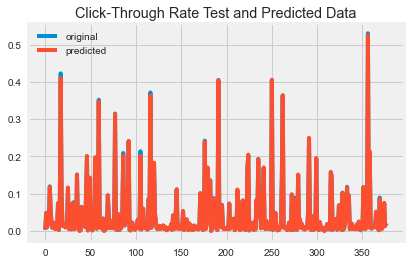

In [720]:
x_ax = range(len(y_test_log))
plt.plot(x_ax, y_test_log, label="original")
plt.plot(x_ax, ypred_log, label="predicted")
plt.title("Click-Through Rate Test and Predicted Data")
plt.legend()
plt.show()

### Observations
$\bullet$ The XGBoost Regressor model with the target variable transformed to its log performed very well, with an R2 of 1.00 (perfect prediction)\
$\bullet$ The next step is to see if the R2 value will change using the 5 Best Features from Chi-Squared to see if the model performance would be improved

## Train and Evaluate the XGBoost Regressor Model with Log of Target Variable and 5 Best Features from Chi-Squared

$\bullet$ The Chi-Squared (most dependent) features on the target (click_rate) are: is_emotions, is_discount, is_price, is_urgent, and target_audience

In [723]:
# Import datasets again to support Log with Chi-Squared
train_log_chi=pd.read_csv('train_CTR.csv')
test_log_chi=pd.read_csv('test_CTR.csv')

In [724]:
train_log_chi.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


<AxesSubplot:ylabel='Density'>

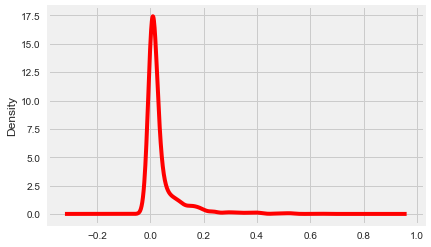

In [725]:
# Reduce the skewness of the target variable with log
train_log_chi['click_rate_log']  = np.log(train_log_chi['click_rate']+1)
train_log_chi.click_rate_log.plot.density(color='red')

In [726]:
# Look at the skew in both click_rate and click_rate_log
print(train_log_chi['click_rate'].skew())
print(train_log_chi['click_rate_log'].skew())

4.317743085163305
3.6811416192586184


In [727]:
train_log_chi.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,click_rate_log
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,14,0.103079,0.098105
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,10,0.700000,0.530628
2,3,3,59,12801,16,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.002769,0.002765
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,10,0.010868,0.010809
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,1,0,0,0,0,0,14,0.142826,0.133504


In [739]:
# https://www.geeksforgeeks.org/linear-regression-python-implementation/
# Splitting the data into Features and Traget
#X_log_chi = train_log_chi['is_emoticons', 'is_discount', 'is_price', 'is_urgency', 'target_audience']
X_log_chi = train_log_chi.iloc[:,-7:-2] #-6 to -2 is'is_emoticons', 'is_discount', 'is_price', 'is_urgency', 'target_audience'
y_log_chi = train_log_chi['click_rate_log']

In [740]:
# Splitting the data into Training data and Test data(20%)
X_train_log_chi, X_test_log_chi, y_train_log_chi, y_test_log_chi = train_test_split(X_log_chi, y_log_chi, test_size = 0.2, random_state = 22)

In [741]:
#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_log_chi = X_train_log_chi.reset_index(drop = True) #drop + True drops the previous index
X_test_log_chi = X_test_log_chi.reset_index(drop = True)
y_train_log_chi = y_train_log_chi.reset_index(drop = True)
y_test_log_chi = y_test_log_chi.reset_index(drop = True)

In [742]:
# instantiate the xgbr model
xgbr_log_chi = xgb.XGBRegressor(verbosity=0)

In [743]:
# fit the model with the trained data
xgbr_log_chi.fit(X_train_log_chi, y_train_log_chi)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [744]:
# check the training score
score_log_chi = xgbr_log_chi.score(X_train_log_chi, y_train_log_chi)  
print("Training score: ", score_log_chi)

Training score:  0.11566764563322074


In [745]:
# check the cross validation score
scores_log_chi = cross_val_score(xgbr_log_chi, X_train_log_chi, y_train_log_chi,cv=10)
print("Mean cross-validation score: %.2f" % scores_log_chi.mean())

Mean cross-validation score: 0.08


In [746]:
# check KFlold method in cross-validation
kfold_log_chi = KFold(n_splits=10, shuffle=True)
kf_cv_scores_log_chi = cross_val_score(xgbr_log_chi, X_train_log_chi, y_train_log_chi, cv=kfold_log_chi)
print("K-fold CV average score: %.2f" % kf_cv_scores_log_chi.mean())

K-fold CV average score: 0.10


In [747]:
# predict test data
ypred_log_chi = xgbr_log_chi.predict(X_test_log_chi)
mse_log_chi = mean_squared_error(y_test_log_chi, ypred_log_chi)
print("MSE: %.2f" % mse_log_chi)
MSE: 3.35
print("RMSE: %.2f" % (mse_log_chi**(1/2.0)))

MSE: 0.00
RMSE: 0.07


In [748]:
# The coefficient of determination (R2 value): 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test_log_chi, ypred_log_chi))

Coefficient of determination (R2): 0.07


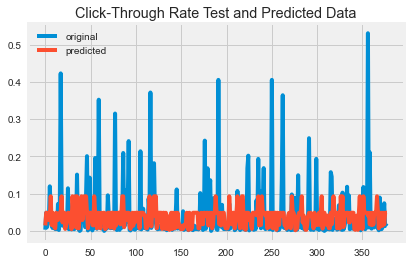

In [749]:
x_ax = range(len(y_test_log_chi))
plt.plot(x_ax, y_test_log_chi, label="original")
plt.plot(x_ax, ypred_log_chi, label="predicted")
plt.title("Click-Through Rate Test and Predicted Data")
plt.legend()
plt.show()

### Observations
$\bullet$ The XGBoost Regressor model with the target variable transformed to its log with only the 5 Best Features from Chi-Squared did not perform very well, with an R2 of 0.06 \
$\bullet$ "As with all inferential statistics, the results are most reliable when the data are collected from randomly selected subjects, and when sample sizes are sufficiently large that they produce appropriate statistical power." (McHugh, 2013). In this dataset, the subjects were not selected randomly so this is most likely why the model performance was lower than expected. 

## Conclusion

$\bullet$ The XGBoost Regressor model with the target variable transformed to its log and all features performed the best, with an R2 of 1.00\
$\bullet$ This will be the model of choice to implement with the Product Team to predict the click-through rate of the email campaigns

##### ASK
1. Is the regression models set up correctly and are the model performance metrics sound? YES
2. 'click_rate_log'is used in regression model because of skew - should it be? or should I use click_rate? YES use log
3. What about the test set in the beginning? Do I need to use it and where? I split the train into X and Y but haven't done anything with the test dataframe yet
###### loading train and test datasets
train=pd.read_csv('train_CTR.csv',index_col='campaign_id')
test=pd.read_csv('test_CTR.csv',index_col='campaign_id') <--- this one
4. Can you get accuracy of a linear model? Or is it not possible because the target isn't binary?
5. Can you make a confusion matrix, precision/recall/F1, and ROC/AUC for linear regression like you can with linear regression? Or is it not possible because the target isn't binary?

In [ ]:
## Backup Visualization

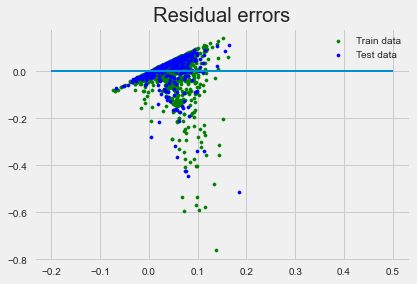

In [518]:
# plot for residual error
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = -0.2, xmax = 0.5, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

### References
$\bullet$ Dhinakaran, A. (2022, December 9). Best practices in ML observability for click-through rate models. Medium. Retrieved December 20, 2022, from https://towardsdatascience.com/best-practices-in-ml-observability-for-click-through-rate-models-8a0c6755a49a \
$\bullet$ Zach. (2020, April 24). What is a good R-squared value? Statology. Retrieved December 20, 2022, from https://www.statology.org/good-r-squared-value/ \
$\bullet$ Gajawada, S. K. (2022, September 28). Chi-square test for feature selection in machine learning. Medium. Retrieved December 22, 2022, from https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223 \
$\bullet$ McHugh, M. L. (2013). The chi-square test of Independence. Biochemia medica. Retrieved January 6, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/ 